In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [49]:
data = pd.read_csv('book-list.csv')
data = data[~data['Category'].isin(['Health, Fitness & Dieting', 'Medical Books',
                                    'Travel', 'Biographies & Memoirs', 'Crafts, Hobbies & Home',
                                    'Law', 'Parenting & Relationships', 'Religion & Spirituality',
                                    'Self-Help', 'Sports & Outdoors'])]
print(data)

                                                   Title            Category
0      The MIDI Manual: A Practical Guide to MIDI in ...  Arts & Photography
1      Splash 16: Exploring Texture (Splash: The Best...  Arts & Photography
2      Picture Perfect Posing: Practicing the Art of ...  Arts & Photography
3      Creative Haven Modern Tattoo Designs Coloring ...  Arts & Photography
4      DÃ­aita: The Rules of Health in the Manuscript...  Arts & Photography
...                                                  ...                 ...
31535  Combinatorics & Probability (Veritas Prep GMAT...    Test Preparation
31536  US Citizenship test 2015 Civics Flash Cards fo...    Test Preparation
31537  TCOLE Test Flashcard Study System: TCOLE Exam ...    Test Preparation
31538  The PowerScore LSAT Logic Games Bible Flashcar...    Test Preparation
31539  Office Technician(Passbooks) (Career Examinati...    Test Preparation

[16600 rows x 2 columns]


In [50]:
title = pd.DataFrame(data['Title'])
category = pd.DataFrame(data['Category'])

In [51]:
print(len(title))
print(len(category))

16600
16600


In [52]:
data.groupby('Category').Title.count()

Category
Arts & Photography              1660
Business & Money                1660
Computers & Technology          1660
Education & Teaching            1660
Engineering & Transportation    1660
History                         1660
Politics & Social Sciences      1660
Reference                       1660
Science & Math                  1660
Test Preparation                1660
Name: Title, dtype: int64

In [53]:
feat = ['Category']
le = LabelEncoder()
for x in feat:
    le.fit(list(category[x].values))
    category[x] = le.transform(list(category[x]))

In [54]:
category['Category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
le.inverse_transform([0])[0]

'Arts & Photography'

In [56]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', strip_accents='unicode')
vectors = vectorizer.fit_transform(data['Title'])
print(vectors.shape)

(16600, 15564)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(vectors, category['Category'], test_size=0.2, train_size=0.8, random_state=0, stratify=category['Category'])

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13280, 15564)
(13280,)
(3320, 15564)
(3320,)


In [59]:
%%time

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, svc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       332
           1       0.68      0.70      0.69       332
           2       0.84      0.79      0.81       332
           3       0.82      0.82      0.82       332
           4       0.79      0.70      0.74       332
           5       0.72      0.79      0.75       332
           6       0.65      0.68      0.66       332
           7       0.79      0.74      0.76       332
           8       0.74      0.71      0.73       332
           9       0.89      0.86      0.87       332

    accuracy                           0.75      3320
   macro avg       0.76      0.75      0.76      3320
weighted avg       0.76      0.75      0.76      3320

CPU times: total: 17 s
Wall time: 17 s


In [60]:
%%time

sgd = SGDClassifier(loss='hinge')
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print("Classification Report:\n", classification_report(y_test, sgd_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       332
           1       0.70      0.68      0.69       332
           2       0.80      0.84      0.82       332
           3       0.77      0.83      0.80       332
           4       0.77      0.71      0.74       332
           5       0.70      0.82      0.75       332
           6       0.73      0.66      0.69       332
           7       0.77      0.74      0.76       332
           8       0.75      0.69      0.72       332
           9       0.89      0.88      0.88       332

    accuracy                           0.76      3320
   macro avg       0.76      0.76      0.76      3320
weighted avg       0.76      0.76      0.76      3320

CPU times: total: 188 ms
Wall time: 208 ms


In [61]:
%%time

cnb = ComplementNB()
cnb.fit(X_train, y_train)
cnb_pred = cnb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, cnb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       332
           1       0.67      0.64      0.66       332
           2       0.78      0.83      0.80       332
           3       0.73      0.84      0.78       332
           4       0.76      0.70      0.73       332
           5       0.69      0.86      0.76       332
           6       0.74      0.64      0.69       332
           7       0.76      0.70      0.73       332
           8       0.78      0.65      0.71       332
           9       0.81      0.90      0.85       332

    accuracy                           0.74      3320
   macro avg       0.74      0.74      0.74      3320
weighted avg       0.74      0.74      0.74      3320

CPU times: total: 31.2 ms
Wall time: 37.2 ms


In [63]:
%%time

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, gbc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.52      0.62       332
           1       0.71      0.55      0.62       332
           2       0.81      0.68      0.74       332
           3       0.75      0.73      0.74       332
           4       0.74      0.55      0.63       332
           5       0.71      0.63      0.67       332
           6       0.29      0.77      0.42       332
           7       0.73      0.62      0.67       332
           8       0.72      0.53      0.61       332
           9       0.90      0.81      0.86       332

    accuracy                           0.64      3320
   macro avg       0.71      0.64      0.66      3320
weighted avg       0.71      0.64      0.66      3320

CPU times: total: 4min 12s
Wall time: 4min 13s


In [70]:
sgd_accuracy = round(accuracy_score(y_test, sgd_pred),2)
svc_accuracy = round(accuracy_score(y_test, svc_pred),2)
cnb_accuracy = round(accuracy_score(y_test, cnb_pred),2)
gbc_accuracy = round(accuracy_score(y_test, gbc_pred),2)

print(sgd_accuracy)
print(svc_accuracy)
print(cnb_accuracy)
print(gbc_accuracy)

0.76
0.75
0.74
0.64


In [72]:
models = ['SGD', 'SVC', 'CNB', 'GBC']
scores = [sgd_accuracy, svc_accuracy, cnb_accuracy, gbc_accuracy]

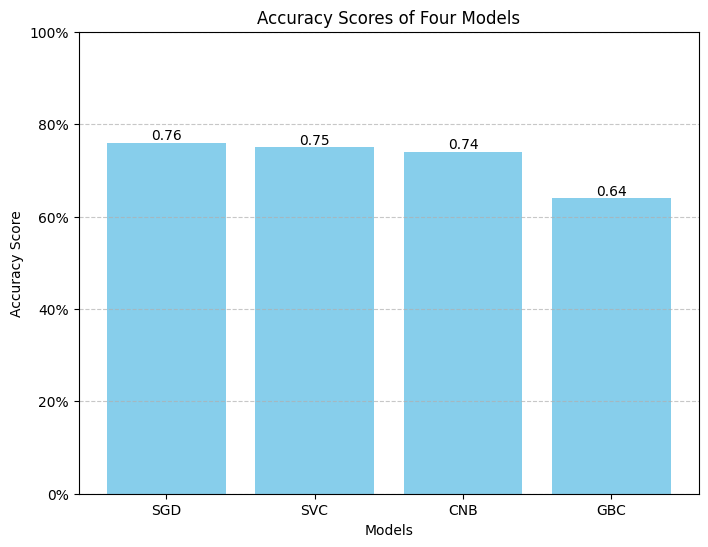

In [84]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models, scores, color='skyblue')
plt.title('Accuracy Scores of Four Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', 
             ha='center', va='bottom', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [85]:
text = ['Technical Core Skill : Modul I (Workshop Tools)']
text[0] = text[0].lower()
text_transform = (vectorizer.transform(text))

In [86]:
sgd_predict = (sgd.predict(text_transform))
svc_predict = (svc.predict(text_transform))
cnb_predict = (cnb.predict(text_transform))
gbc_predict = (gbc.predict(text_transform))

In [87]:
print(le.inverse_transform(sgd_predict)[0])
print(le.inverse_transform(svc_predict)[0])
print(le.inverse_transform(cnb_predict)[0])
print(le.inverse_transform(gbc_predict)[0])

Education & Teaching
Education & Teaching
Education & Teaching
Education & Teaching


In [88]:
dump(le, 'label.pkl')
dump(vectorizer, 'vectorizer.pkl')
dump(sgd, 'model.pkl')
print("Model Saved")

Model Saved
